# Madhurima Paul

# Data Science and Business Analytics Intern @ The Sparks Foundation

# Topic:Timeline Analysis : Covid-19-Task 8

# Dataset:https://bit.ly/30d2gdi

The following code aims at providing a detailed Timeline Analysis of the Covid affected regions across the world, and visualizing them.

# PROBLEM STATEMENT:

Identify detailed patterns and possible conclusions regarding Covid-19 spread with basic as well as advanced charts.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [2]:
#Reading the Data
covid_data = pd.read_csv('C:\\Users\Madhurima Paul\Downloads\owid-covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
# Analyzing the rows and columns count of the dataset
covid_data.shape

(73384, 59)

In [4]:
# Analyzing the data types of all the attributes present and their count
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73384 entries, 0 to 73383
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               73384 non-null  object 
 1   continent                              69750 non-null  object 
 2   location                               73384 non-null  object 
 3   date                                   73384 non-null  object 
 4   total_cases                            72326 non-null  float64
 5   new_cases                              72324 non-null  float64
 6   new_cases_smoothed                     71323 non-null  float64
 7   total_deaths                           63170 non-null  float64
 8   new_deaths                             63328 non-null  float64
 9   new_deaths_smoothed                    71323 non-null  float64
 10  total_cases_per_million                71931 non-null  float64
 11  ne

In [5]:
# Identifying the columns present
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [6]:
# Descripting of the numerical attributes present in the dataset
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.232600e+04,72324.000000,71323.000000,6.317000e+04,63328.000000,71323.000000,71931.000000,71929.000000,70933.000000,62788.000000,...,66861.000000,45650.000000,67506.000000,68356.000000,53073.000000,52344.000000,33877.000000,61796.000000,69728.000000,67445.000000
mean,6.309405e+05,5133.419570,5148.895112,1.884372e+04,131.705423,115.824077,7457.152377,65.843446,65.798186,176.695576,...,19124.924520,13.272304,257.142324,7.795210,10.551031,32.648076,51.013951,3.036489,73.138549,0.727915
std,4.444134e+06,32209.604366,31944.665417,1.100672e+05,722.437700,659.922384,14727.855668,167.558912,140.727708,315.276769,...,19684.256471,19.919286,118.425077,3.936477,10.410374,13.465837,31.768424,2.467787,7.549671,0.150141
min,1.000000e+00,-74347.000000,-5648.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.210000e+02,2.000000,5.857000,3.700000e+01,0.000000,0.000000,142.924000,0.131000,0.987000,5.585500,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.602000
50%,7.818000e+03,58.000000,70.571000,2.450000e+02,2.000000,1.000000,1047.258000,6.271000,8.299000,30.635000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,8.469400e+04,665.000000,691.571000,2.320000e+03,16.000000,12.143000,6861.506500,55.905000,62.900000,186.622000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.168439e+08,879905.000000,738686.000000,2.593222e+06,17891.000000,14418.714000,142910.762000,8652.658000,2648.773000,2239.378000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [7]:
#Checking for count of all the unique values present for each attribute
covid_data.nunique()

iso_code                                   215
continent                                    6
location                                   215
date                                       432
total_cases                              37993
new_cases                                10103
new_cases_smoothed                       19203
total_deaths                             14403
new_deaths                                2467
new_deaths_smoothed                       5482
total_cases_per_million                  55443
new_cases_per_million                    31776
new_cases_smoothed_per_million           35725
total_deaths_per_million                 33557
new_deaths_per_million                    6364
new_deaths_smoothed_per_million           7562
reproduction_rate                          355
icu_patients                              1984
icu_patients_per_million                  4200
hosp_patients                             3928
hosp_patients_per_million                 6861
weekly_icu_ad

In [8]:
# Checking for count of NULL values for each column 
covid_data.isnull().sum()

iso_code                                     0
continent                                 3634
location                                     0
date                                         0
total_cases                               1058
new_cases                                 1060
new_cases_smoothed                        2061
total_deaths                             10214
new_deaths                               10056
new_deaths_smoothed                       2061
total_cases_per_million                   1453
new_cases_per_million                     1455
new_cases_smoothed_per_million            2451
total_deaths_per_million                 10596
new_deaths_per_million                   10438
new_deaths_smoothed_per_million           2451
reproduction_rate                        14270
icu_patients                             65745
icu_patients_per_million                 65745
hosp_patients                            64199
hosp_patients_per_million                64199
weekly_icu_ad

In [9]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           19274
Europe           17728
Asia             17523
North America     8660
South America     4476
Oceania           2089
Name: continent, dtype: int64

In [10]:
# Analyzing cases worldwide 
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
654,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1408,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
1779,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2132,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2515,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
2947,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3319,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
3730,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# looking at different locations
covid_data["location"].value_counts()

Mexico              432
Argentina           432
Thailand            429
Taiwan              417
South Korea         412
                   ... 
Montserrat           16
Falkland Islands     16
Macao                11
Northern Cyprus       9
Saint Helena          1
Name: location, Length: 215, dtype: int64

In [12]:
# covid cases in india

india=covid_data[covid_data["location"]=="India"]

In [13]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30153,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30154,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30155,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30156,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30157,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


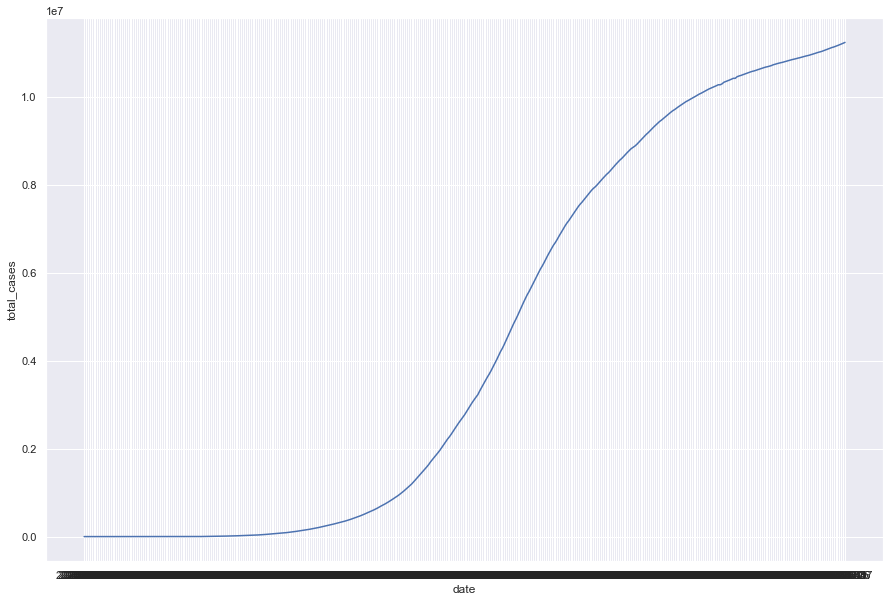

In [15]:
#Data Visualization
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [16]:

india_last_5_days=india.tail()

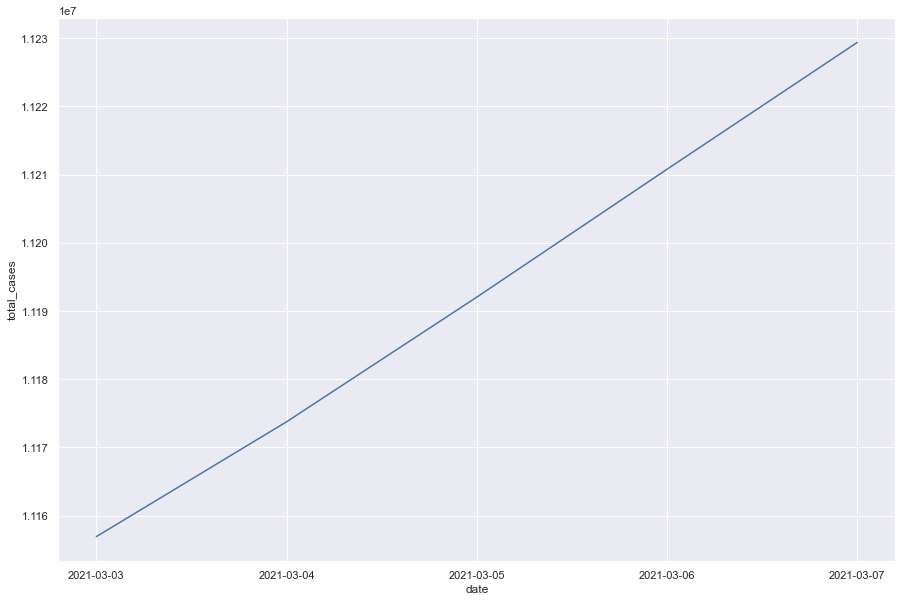

In [17]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

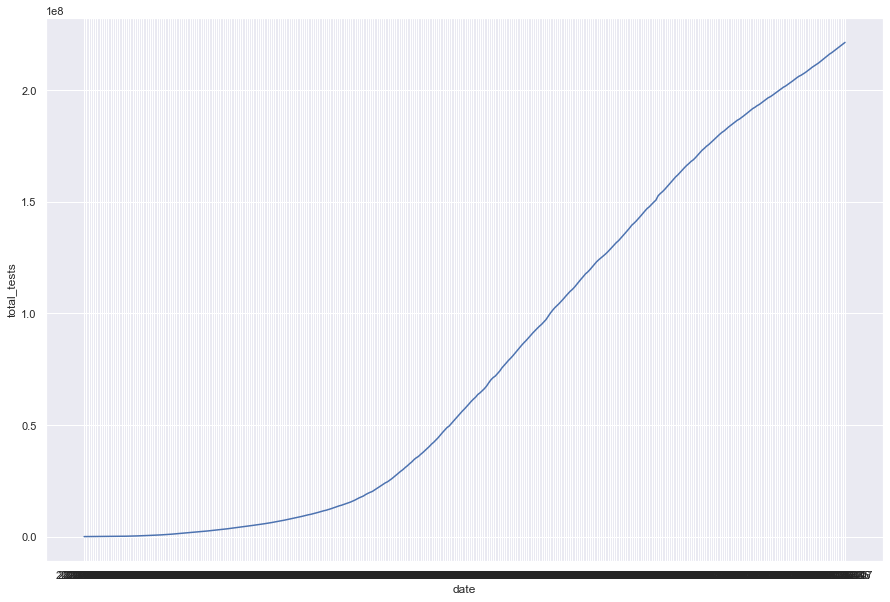

In [18]:
# total test per day

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india)
plt.show()

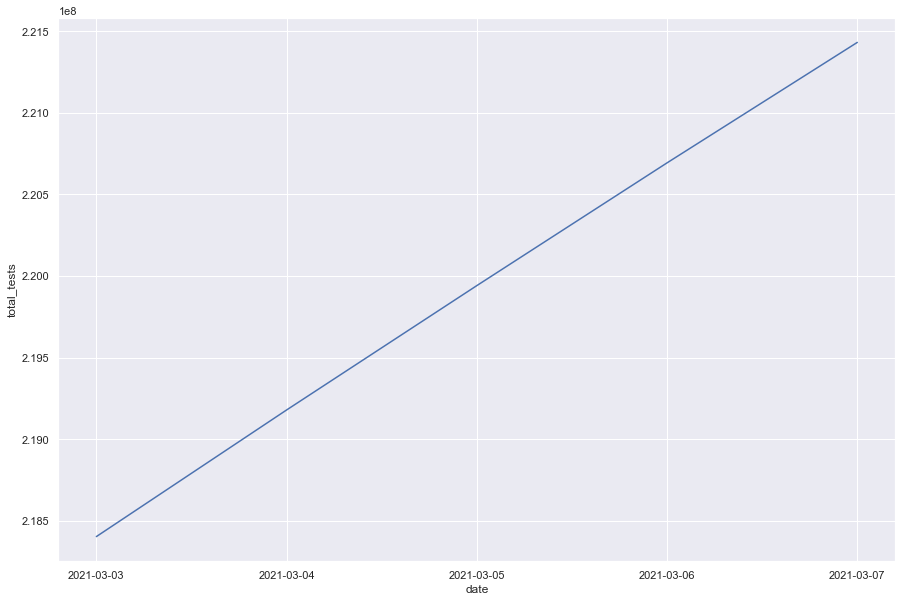

In [19]:
# total test last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_5_days)
plt.show()

In [20]:

# covid cases in Brazil

brazil=covid_data[covid_data["location"]=="Brazil"]

In [21]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9432,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9433,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9434,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9435,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9436,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [22]:
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9803,BRA,South America,Brazil,2021-03-03,10718630.0,71704.0,56309.571,259271.0,1910.0,1330.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9804,BRA,South America,Brazil,2021-03-04,10793732.0,75102.0,57610.143,260970.0,1699.0,1353.143,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9805,BRA,South America,Brazil,2021-03-05,10869227.0,75495.0,59085.286,262770.0,1800.0,1419.286,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9806,BRA,South America,Brazil,2021-03-06,10938836.0,69609.0,60229.143,264325.0,1555.0,1443.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9807,BRA,South America,Brazil,2021-03-07,11019344.0,80508.0,66869.286,265411.0,1086.0,1495.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [23]:
brazil_last_5_days=brazil.tail()

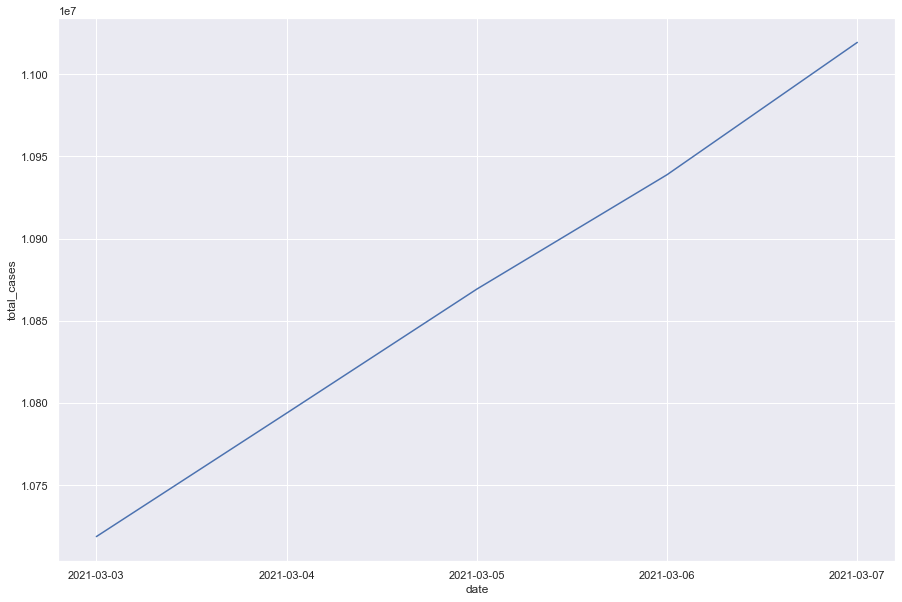

In [24]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [25]:
# understanding cases of india,china and japan

india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

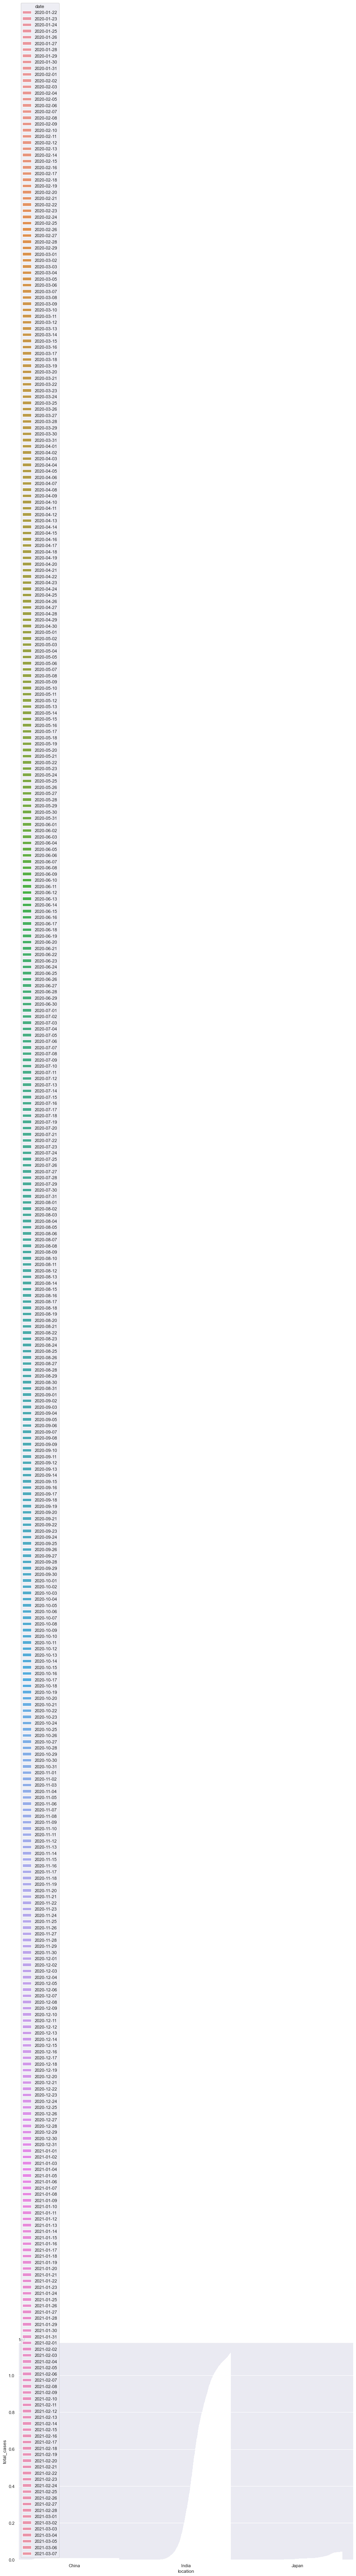

In [26]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [27]:
# understanding cases of germany and spain


germany_spain=covid_data[(covid_data["location"]=="Germany") | (covid_data["location"]=="Spain")]

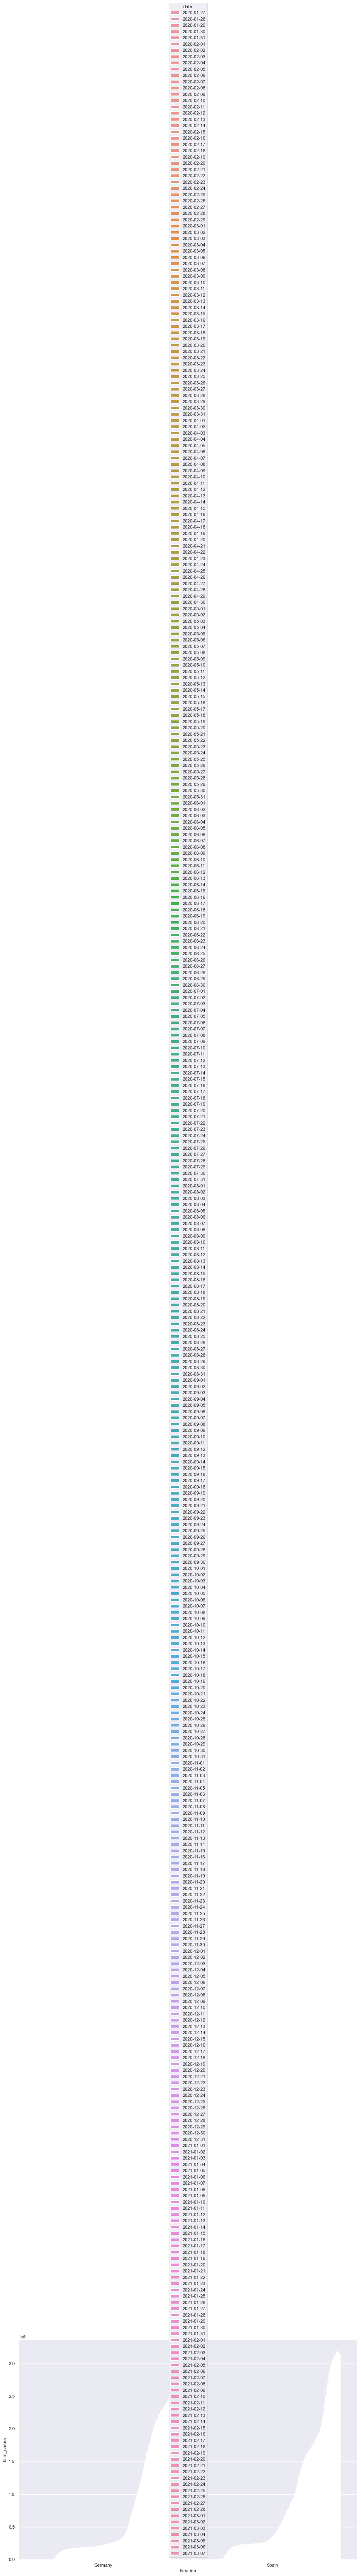

In [28]:

# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

In [29]:
# getting latset data

last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
687,OWID_AFR,NaN,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
1441,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
1812,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71853,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
72264,OWID_WRL,NaN,World,2020-12-18,75761114.0,719381.0,645058.429,1679916.0,12761.0,11570.286,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
72596,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
72951,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [30]:
# sorting date w.r.t to total cases

max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72264,OWID_WRL,NaN,World,2020-12-18,75761114.0,719381.0,645058.429,1679916.0,12761.0,11570.286,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
22681,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48581,OWID_NAM,NaN,North America,2020-12-18,20222858.0,276458.0,243086.857,467777.0,3905.0,3526.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3763,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69881,USA,North America,United States,2020-12-18,17546621.0,251161.0,220280.286,318292.0,2939.0,2708.286,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71084,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
60018,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
41813,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.704
56161,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715


In [31]:
# top 5 countries with maximum case
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
22681,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48581,OWID_NAM,NaN,North America,2020-12-18,20222858.0,276458.0,243086.857,467777.0,3905.0,3526.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3763,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69881,USA,North America,United States,2020-12-18,17546621.0,251161.0,220280.286,318292.0,2939.0,2708.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
23091,OWID_EUN,NaN,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


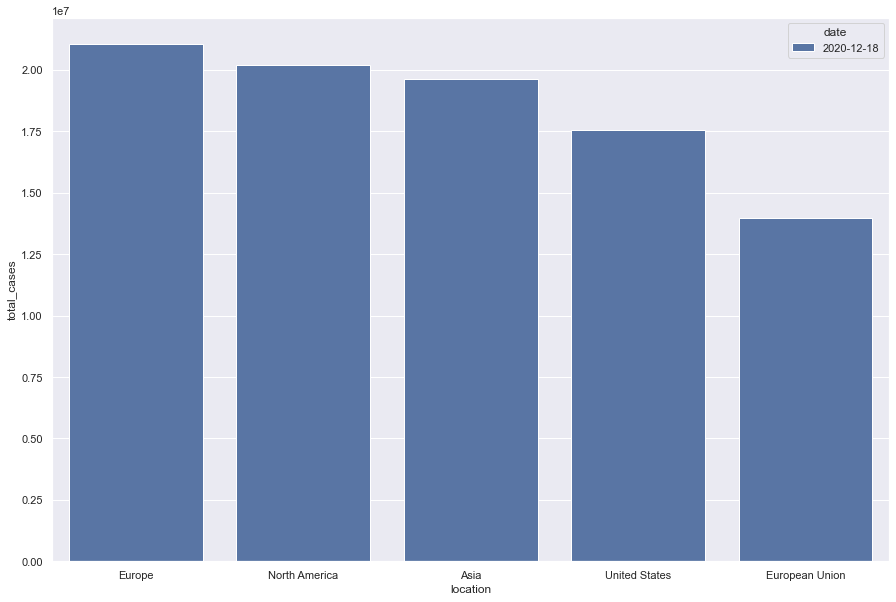

In [32]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()

# Thank you!!!